In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimag

import numpy as np
import cv2
import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from keras.optimizers import Adam
from keras.utils.np_utils import to_categorical

from sklearn.utils import shuffle 
from sklearn.model_selection import train_test_split

import os
import pandas as pd

Using TensorFlow backend.


In [2]:
# determine the colmuns of data for dataFrame pandas
# we have tow columns (signs , type)
colmuns=["signs","type"]

# read CSV file 
data = pd.read_csv("signs.csv",names=colmuns)
pd.set_option("display.max_colwidth",-1)

# show the first five rows
print(data.head())

# show row
data.iloc[500]

   signs  type
0  0.jpg  0   
1  1.jpg  0   
2  2.jpg  0   
3  3.jpg  0   
4  4.jpg  0   


signs    500.jpg
type     3      
Name: 500, dtype: object

In [4]:
# load the data (image and type)
def load_imageAndtype(data_path,df):
    # define image list for put all image on it
    image=[]
    
    # define sign type list for put all types on it
    sign_type=[]
    
    # for every row put the image in image list and type sign on the sign_type list
    for i in range(len(df)):
        index_data = df.iloc[i]
        image.append(os.path.join(data_path , index_data[0].strip()))
        sign_type.append(index_data[1])
    
    # convert the image and type lists to arrays
    image_array = np.asarray(image)
    signs_type_array = np.asarray(sign_type)
    
    return image_array,signs_type_array


image , signs_type = load_imageAndtype("photo/",data)

print(image)
print(signs_type)

['photo/0.jpg' 'photo/1.jpg' 'photo/2.jpg' 'photo/3.jpg' 'photo/4.jpg'
 'photo/5.jpg' 'photo/6.jpg' 'photo/7.jpg' 'photo/8.jpg' 'photo/9.jpg'
 'photo/10.jpg' 'photo/11.jpg' 'photo/12.jpg' 'photo/13.jpg'
 'photo/14.jpg' 'photo/15.jpg' 'photo/16.jpg' 'photo/17.jpg'
 'photo/18.jpg' 'photo/19.jpg' 'photo/20.jpg' 'photo/21.jpg'
 'photo/22.jpg' 'photo/23.jpg' 'photo/24.jpg' 'photo/25.jpg'
 'photo/26.jpg' 'photo/27.jpg' 'photo/28.jpg' 'photo/29.jpg'
 'photo/30.jpg' 'photo/31.jpg' 'photo/32.jpg' 'photo/33.jpg'
 'photo/34.jpg' 'photo/35.jpg' 'photo/36.jpg' 'photo/37.jpg'
 'photo/38.jpg' 'photo/39.jpg' 'photo/40.jpg' 'photo/41.jpg'
 'photo/42.jpg' 'photo/43.jpg' 'photo/44.jpg' 'photo/45.jpg'
 'photo/46.jpg' 'photo/47.jpg' 'photo/48.jpg' 'photo/49.jpg'
 'photo/50.jpg' 'photo/51.jpg' 'photo/52.jpg' 'photo/53.jpg'
 'photo/54.jpg' 'photo/55.jpg' 'photo/56.jpg' 'photo/57.jpg'
 'photo/58.jpg' 'photo/59.jpg' 'photo/60.jpg' 'photo/61.jpg'
 'photo/62.jpg' 'photo/63.jpg' 'photo/64.jpg' 'photo/65.jpg'
 'ph

In [5]:
# split the data to train and test 
X_train ,X_valid ,y_train ,y_valid = train_test_split(image,signs_type ,test_size=0.2 ,random_state =6)

In [6]:
print(y_train[1])
print(X_train.shape)
print(X_valid.shape)

3
(599,)
(150,)


In [7]:
# this method to process the image 
def process_img(path):
    img = mpimag.imread(path)
    img = cv2.resize(img,(32,32))
    img = img/255
    return img 


(32, 32)


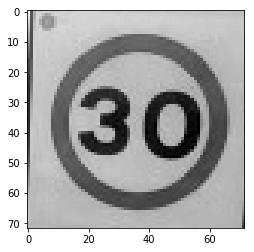

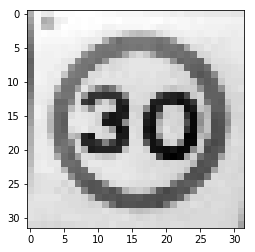

In [8]:
sample=400
img = mpimag.imread(X_train[sample])
img_p = process_img(X_train[sample])

plt.figure(1)
plt.imshow(img,cmap="gray")

plt.figure(2)
plt.imshow(img_p,cmap="gray")

print(img_p.shape)

In [9]:
#process all image for train and test
X_train = np.array(list(map(process_img,X_train)))
X_valid = np.array(list(map(process_img,X_valid)))


In [10]:
y_train = to_categorical(y_train,5)
y_valid = to_categorical(y_valid,5)


In [11]:
y_train[9]

array([0., 0., 0., 0., 1.], dtype=float32)

[[0.41568627 0.51372549 0.49411765 ... 0.49019608 0.48627451 0.48627451]
 [0.39607843 0.51372549 0.41176471 ... 0.50588235 0.50196078 0.50196078]
 [0.38039216 0.50980392 0.43529412 ... 0.49803922 0.49803922 0.49803922]
 ...
 [0.48235294 0.47843137 0.47843137 ... 0.46666667 0.46666667 0.43921569]
 [0.48235294 0.47843137 0.4745098  ... 0.46666667 0.4627451  0.42352941]
 [0.47058824 0.47058824 0.46666667 ... 0.46666667 0.4627451  0.4       ]]
(32, 32)
[0. 0. 0. 1. 0.]
(599, 32, 32)
(150, 32, 32)


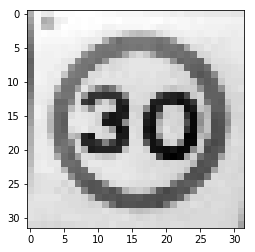

In [12]:
sample=400
print(X_train[sample])
print(X_train[sample].shape)
print(y_train[sample])
plt.imshow(X_train[sample],cmap="gray")

print(X_train.shape)
print(X_valid.shape)

In [13]:
#reshape the image to (1,32,32,1)
X_train = X_train.reshape(len(X_train),32,32,1)
X_valid = X_valid.reshape(len(X_valid),32,32,1)

In [14]:
print(X_train.shape)
print(X_valid.shape)

(599, 32, 32, 1)
(150, 32, 32, 1)


In [15]:
# initail data generator to generate new image form one image 
# the new images will be (zoom,rotate,shear,...) 
from keras.preprocessing.image import ImageDataGenerator

data_generator = ImageDataGenerator(width_shift_range=0.1,
                                    height_shift_range=0.1,
                                    zoom_range=0.2,
                                    shear_range=0.1,
                                    rotation_range=10.)



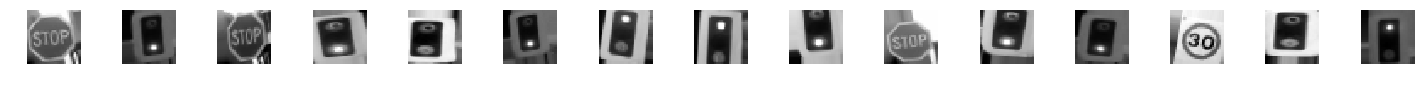

In [16]:
batches = data_generator.flow(X_train,y_train,batch_size=20)

X_batch ,y_batch = next(batches)

fig , axs = plt.subplots(1,15 ,figsize=(20,5))
fig.tight_layout()

for i in range(15):
    axs[i].imshow(X_batch[i].reshape(32,32),cmap=plt.get_cmap("gray"))
    axs[i].axis("off")

In [17]:
# this method define new model 
# we determine two convolutions layers and Maxplooing layer for tow times
# Dropout layer to dorp unimportant neurons 
# output layer will consist of four neurons for (red,green,stop,limit)
def leNet_model():
    model = Sequential()

    model.add(Conv2D(60,(5,5),input_shape=(32,32,1),activation="relu"))

    model.add(Conv2D(60,(5,5),input_shape=(32,32,1),activation="relu"))

    model.add(MaxPooling2D(pool_size=(2,2)))

    model.add(Conv2D(30,(3,3),activation="relu"))
    model.add(Conv2D(30,(3,3),activation="relu"))
    model.add(MaxPooling2D(pool_size=(2,2)))
    
    #model.add(Dropout(0.5))

    model.add(Flatten())

    model.add(Dense(500,activation="relu"))
    model.add(Dropout(0.5))
    model.add(Dense(5,activation="softmax"))
    
    model.compile(Adam(lr=0.001),loss="categorical_crossentropy",metrics=["accuracy"])

    return model

In [18]:
model=leNet_model()
print(model.summary())

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 60)        1560      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 60)        90060     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 60)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 10, 10, 30)        16230     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 8, 8, 30)          8130      
_________________________________________________________________
max_pooling2d_2 (MaxP

In [19]:
his = model.fit_generator(data_generator.flow(X_train,y_train,batch_size=20),
                              steps_per_epoch=100,epochs=10,validation_data=(X_valid, y_valid), shuffle = 1)

Instructions for updating:
Use tf.cast instead.
Epoch 1/10
100/100 [==============================] - 30s 305ms/step - loss: 0.7057 - acc: 0.7302 - val_loss: 0.1072 - val_acc: 0.9800
Epoch 2/10
100/100 [==============================] - 29s 288ms/step - loss: 0.2050 - acc: 0.9348 - val_loss: 0.0393 - val_acc: 0.9933
Epoch 3/10
100/100 [==============================] - 29s 286ms/step - loss: 0.1459 - acc: 0.9574 - val_loss: 0.0218 - val_acc: 0.9933
Epoch 4/10
100/100 [==============================] - 29s 288ms/step - loss: 0.0727 - acc: 0.9770 - val_loss: 0.0367 - val_acc: 0.9933
Epoch 5/10
100/100 [==============================] - 29s 290ms/step - loss: 0.0816 - acc: 0.9809 - val_loss: 0.0311 - val_acc: 0.9933
Epoch 6/10
100/100 [==============================] - 28s 285ms/step - loss: 0.0409 - acc: 0.9890 - val_loss: 0.0171 - val_acc: 0.9933
Epoch 7/10
100/100 [==============================] - 29s 289ms/step - loss: 0.0678 - acc: 0.9784 - val_loss: 0.0305 - val_acc: 0.9933
Epoch 8

Text(0.5, 0, 'epoch')

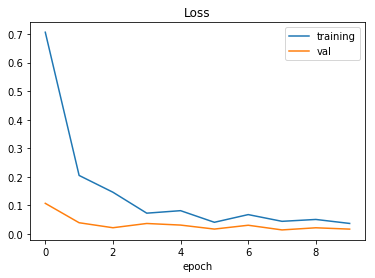

In [20]:
plt.plot(his.history['loss'])
plt.plot(his.history['val_loss'])
plt.legend(['training','val'])
plt.title('Loss')
plt.xlabel('epoch')

Text(0.5, 0, 'epoch')

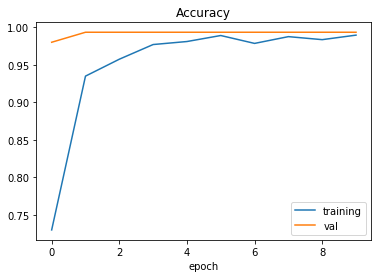

In [21]:
plt.plot(his.history['acc'])
plt.plot(his.history['val_acc'])
plt.legend(['training','val'])
plt.title('Accuracy')
plt.xlabel('epoch')

In [29]:
img  = X_train[386].reshape(1,32,32,1)
predict = model.predict_classes(img) 
print("predicted sign: "+ str(predict))


predicted sign: [1]


In [30]:
model.save("saved_model/model_signs1.xml")